In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [34]:
df0 = pd.read_pickle('Reviewed.pkl')

In [35]:
df = df0.drop(['id','host_verifications_[\'email\']','group'],axis = 1).dropna().reset_index(drop = True).copy()

# Cleaning and Standardizing

In [36]:
# Drop any listing that hasn't been up for 365 days
df = df[df['days_since_host']>=365].reset_index(drop = True)
# standardizing only one avail days : average monthly
df['availability'] = round((df['availability_30']+df['availability_60']/2+df['availability_90']/3+df['availability_365']/12)/4,2)
df = df.drop(['availability_30','availability_60','availability_90','availability_365'], axis = 1)

Text(0.5, 0, 'Days')

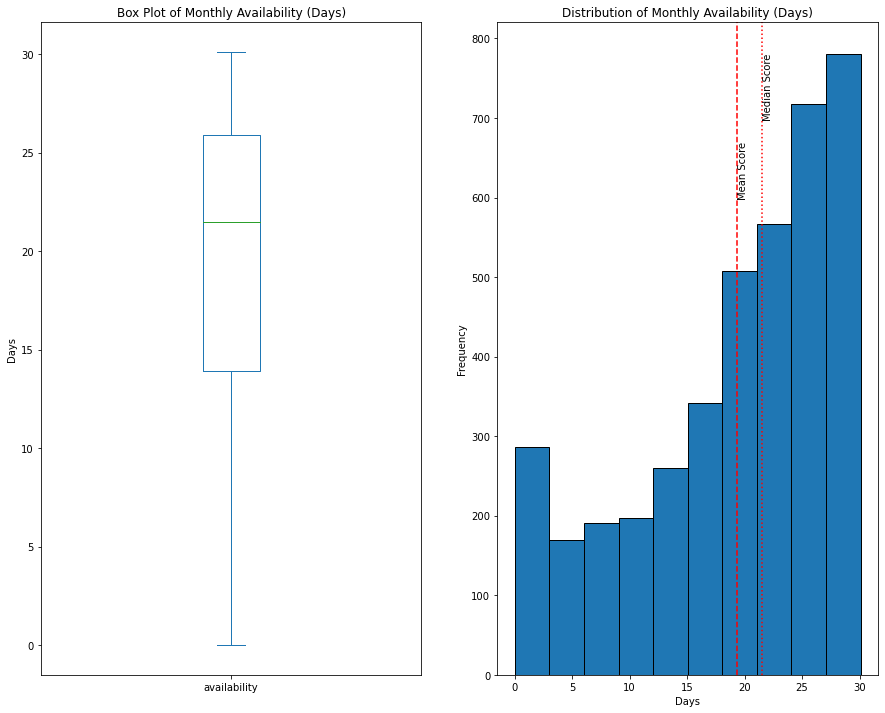

In [37]:
# Plotting new availability
fig,axs = plt.subplots(nrows = 1, ncols = 2, figsize = (15,12))
axs[0].set_title('Box Plot of Monthly Availability (Days)')
axs[1].set_title('Distribution of Monthly Availability (Days)')

bp = df['availability'].plot(kind = 'box', ax = axs[0])
hp = df['availability'].plot(kind = 'hist', edgecolor = 'black', ax = axs[1])

bp.set_ylabel('Days')
hp.axvline(x = df['availability'].mean(), color = 'r',linestyle='--')
hp.axvline(x = df['availability'].median(), color = 'r',linestyle=':')
hp.text(df['availability'].mean()+.15,600, 'Mean Score',rotation = 90)
hp.text(df['availability'].median()+.15,700, 'Median Score',rotation = 90)
hp.set_xlabel('Days')

# Correlation with Price and Availability

In [38]:
def correlation(target_col):
    results = []
    cols = df.columns
    for col in cols:
        corr, p = st.pearsonr(df[col], df[target_col])
        results.append((col, corr, p))
    corr_df = pd.DataFrame(results, columns=['Feature', 'Correlation', 'P-Value'])
    corr_df = corr_df.set_index('Feature')
    corr_df = corr_df.sort_values(by='Correlation', ascending=False)[1:]
    corr_df = corr_df.reset_index()
    # Top 10 negative and Positive Fields with price
    top_corr = pd.concat([corr_df[-10:].sort_values(by = 'Correlation').reset_index(drop = True),corr_df.head(10).reset_index(drop = True)], axis = 1)
    top_corr.columns = ['Negative Field', 'Negative Correlation','Negative P-Value','Positive Field','Positive Correlation','Positive P-Value']
    return top_corr

In [39]:
correlation('price')

,Negative Field,Negative Correlation,Negative P-Value,Positive Field,Positive Correlation,Positive P-Value
0,bathrooms_shared,-0.420603,4.978711e-172,accommodates,0.524164,1.744937e-282
1,room_type_Private room,-0.408376,2.416863e-161,bedrooms,0.497782,1.243413e-250
2,amenities_1,-0.233299,8.407329e-51,beds,0.458034,1.258165e-207
3,mi_to_loop,-0.194491,1.517215e-35,bathrooms_count,0.328912,5.438743e-102
4,mi_to_lincoln,-0.192826,5.872758e-35,review_scores_location,0.161931,5.184963e-25
5,room_type_Shared room,-0.132538,3.285826e-17,description_5,0.157948,7.335352e-24
6,number_of_reviews,-0.102065,8.897333e-11,review_scores_cleanliness,0.147097,7.097698e-21
7,description_3,-0.095240,1.457929e-09,description_2,0.125512,1.405164e-15
8,days_since_first_review,-0.091492,6.251967e-09,review_scores_rating,0.124262,2.681426e-15
9,minimum_nights,-0.080530,3.198910e-07,host_is_superhost,0.115569,2.012037e-13


In [40]:
correlation('availability')

,Negative Field,Negative Correlation,Negative P-Value,Positive Field,Positive Correlation,Positive P-Value
0,neighborhood_overview_1,-0.120293,2.001661e-14,description_5,0.132446,3.456551e-17
1,days_since_last_review,-0.120133,2.167231e-14,accommodates,0.117741,7.043691e-14
2,days_since_host,-0.117113,9.560169e-14,amenities_3,0.112687,7.860556e-13
3,review_scores_accuracy,-0.091476,6.291738e-09,beds,0.105442,2.079672e-11
4,review_scores_value,-0.091197,6.995170e-09,neighborhood_overview_2,0.095225,1.467019e-09
5,review_scores_rating,-0.084560,7.961333e-08,bedrooms,0.091005,7.523934e-09
6,days_since_first_review,-0.074683,2.146194e-06,instant_bookable,0.076311,1.280773e-06
7,review_scores_communication,-0.073645,2.967258e-06,price,0.075334,1.748032e-06
8,review_scores_cleanliness,-0.066227,2.654412e-05,room_type_Hotel room,0.071481,5.748813e-06
9,host_is_superhost,-0.065405,3.339170e-05,license,0.062923,6.572704e-05


<AxesSubplot:>

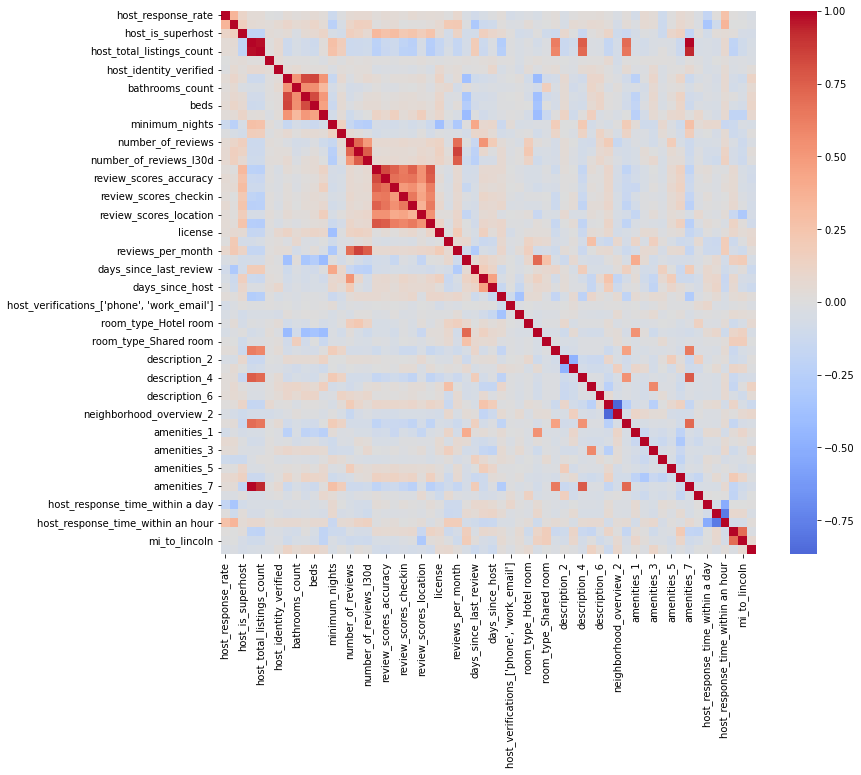

In [41]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(), cmap='coolwarm', center=0)

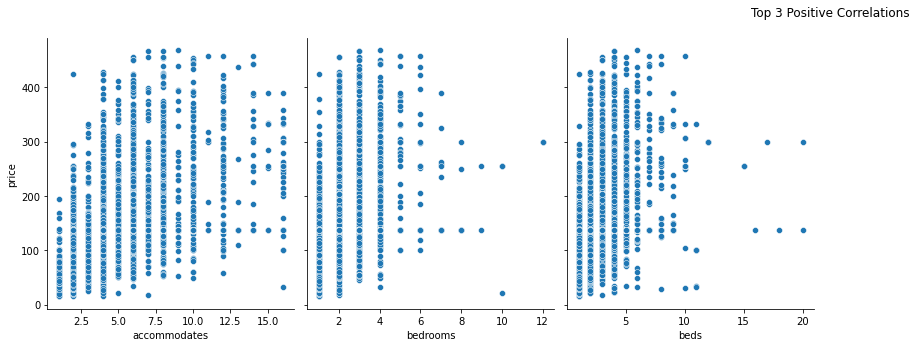

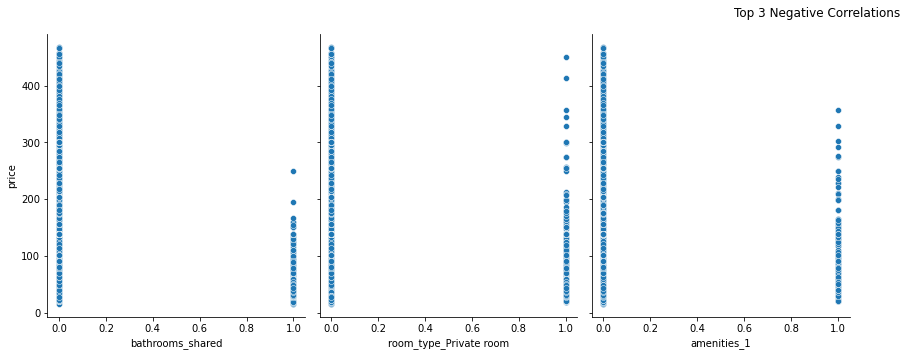

In [42]:
# Plot scatterplots of the most correlated features with 'price'
a = sns.pairplot(df, x_vars=correlation('price')[:3]['Positive Field'].tolist(), y_vars=['price'], kind='scatter')
a.fig.suptitle('Top 3 Positive Correlations', y = 1.05, x = 1)
a.fig.set_size_inches(12,5)
b = sns.pairplot(df, x_vars=correlation('price')[:3]['Negative Field'].tolist(), y_vars=['price'], kind='scatter')
b.fig.suptitle('Top 3 Negative Correlations', x = .95)
b.fig.set_size_inches(12,5)
plt.tight_layout()

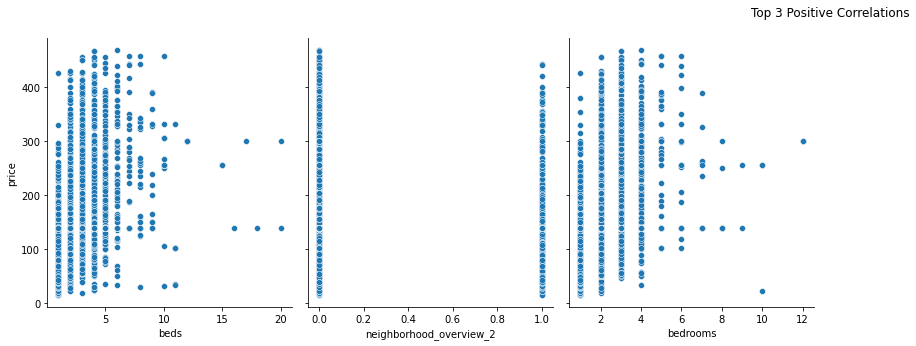

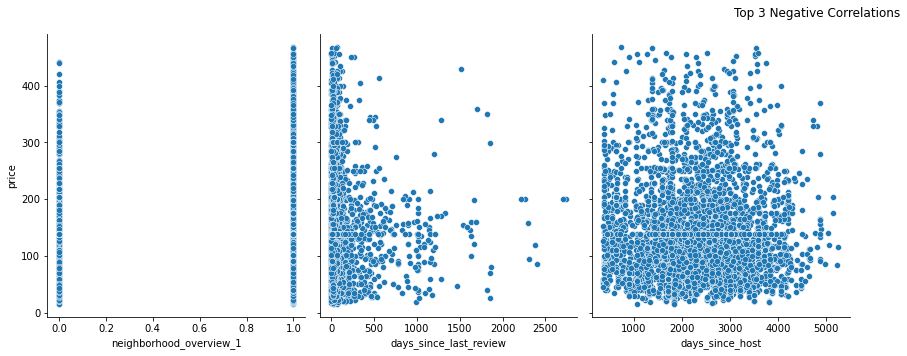

In [43]:
# Plot scatterplots of the most correlated features with availibility
a = sns.pairplot(df, x_vars=correlation('availability')[3:6]['Positive Field'].tolist(), y_vars=['price'], kind='scatter')
a.fig.suptitle('Top 3 Positive Correlations', y = 1.05, x = 1)
a.fig.set_size_inches(12,5)
b = sns.pairplot(df, x_vars=correlation('availability')[:3]['Negative Field'].tolist(), y_vars=['price'], kind='scatter')
b.fig.suptitle('Top 3 Negative Correlations', x = .95)
b.fig.set_size_inches(12,5)
plt.tight_layout()

# Looking into Miles from Lincoln Park/Loop

In [59]:
hue_var = 'accommodates'
location = 'mi_to_lincoln'

Text(0.5, 1.0, 'Miles to hotspots and Nightly Price')

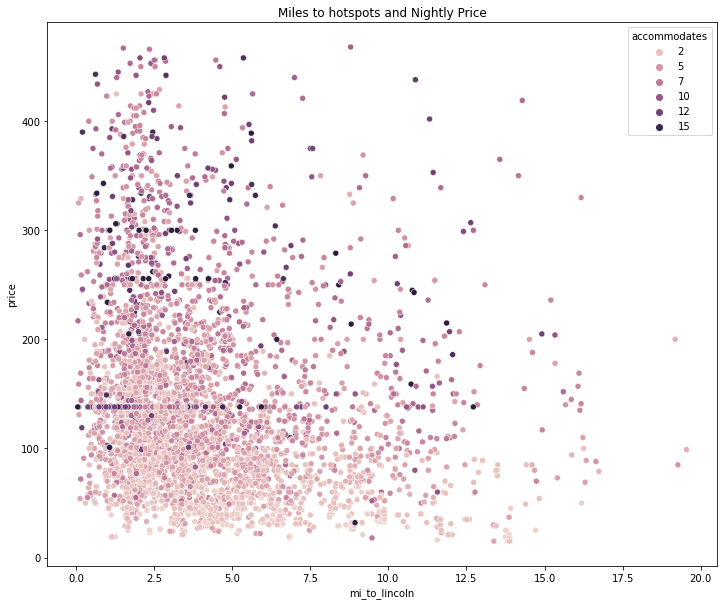

In [60]:
# distance in miles from hot spots (scatter plot) w price
plt.figure(figsize = (12,10))
sns.scatterplot(data = df, x = location, y = 'price', hue = hue_var)
plt.title('Miles to hotspots and Nightly Price')

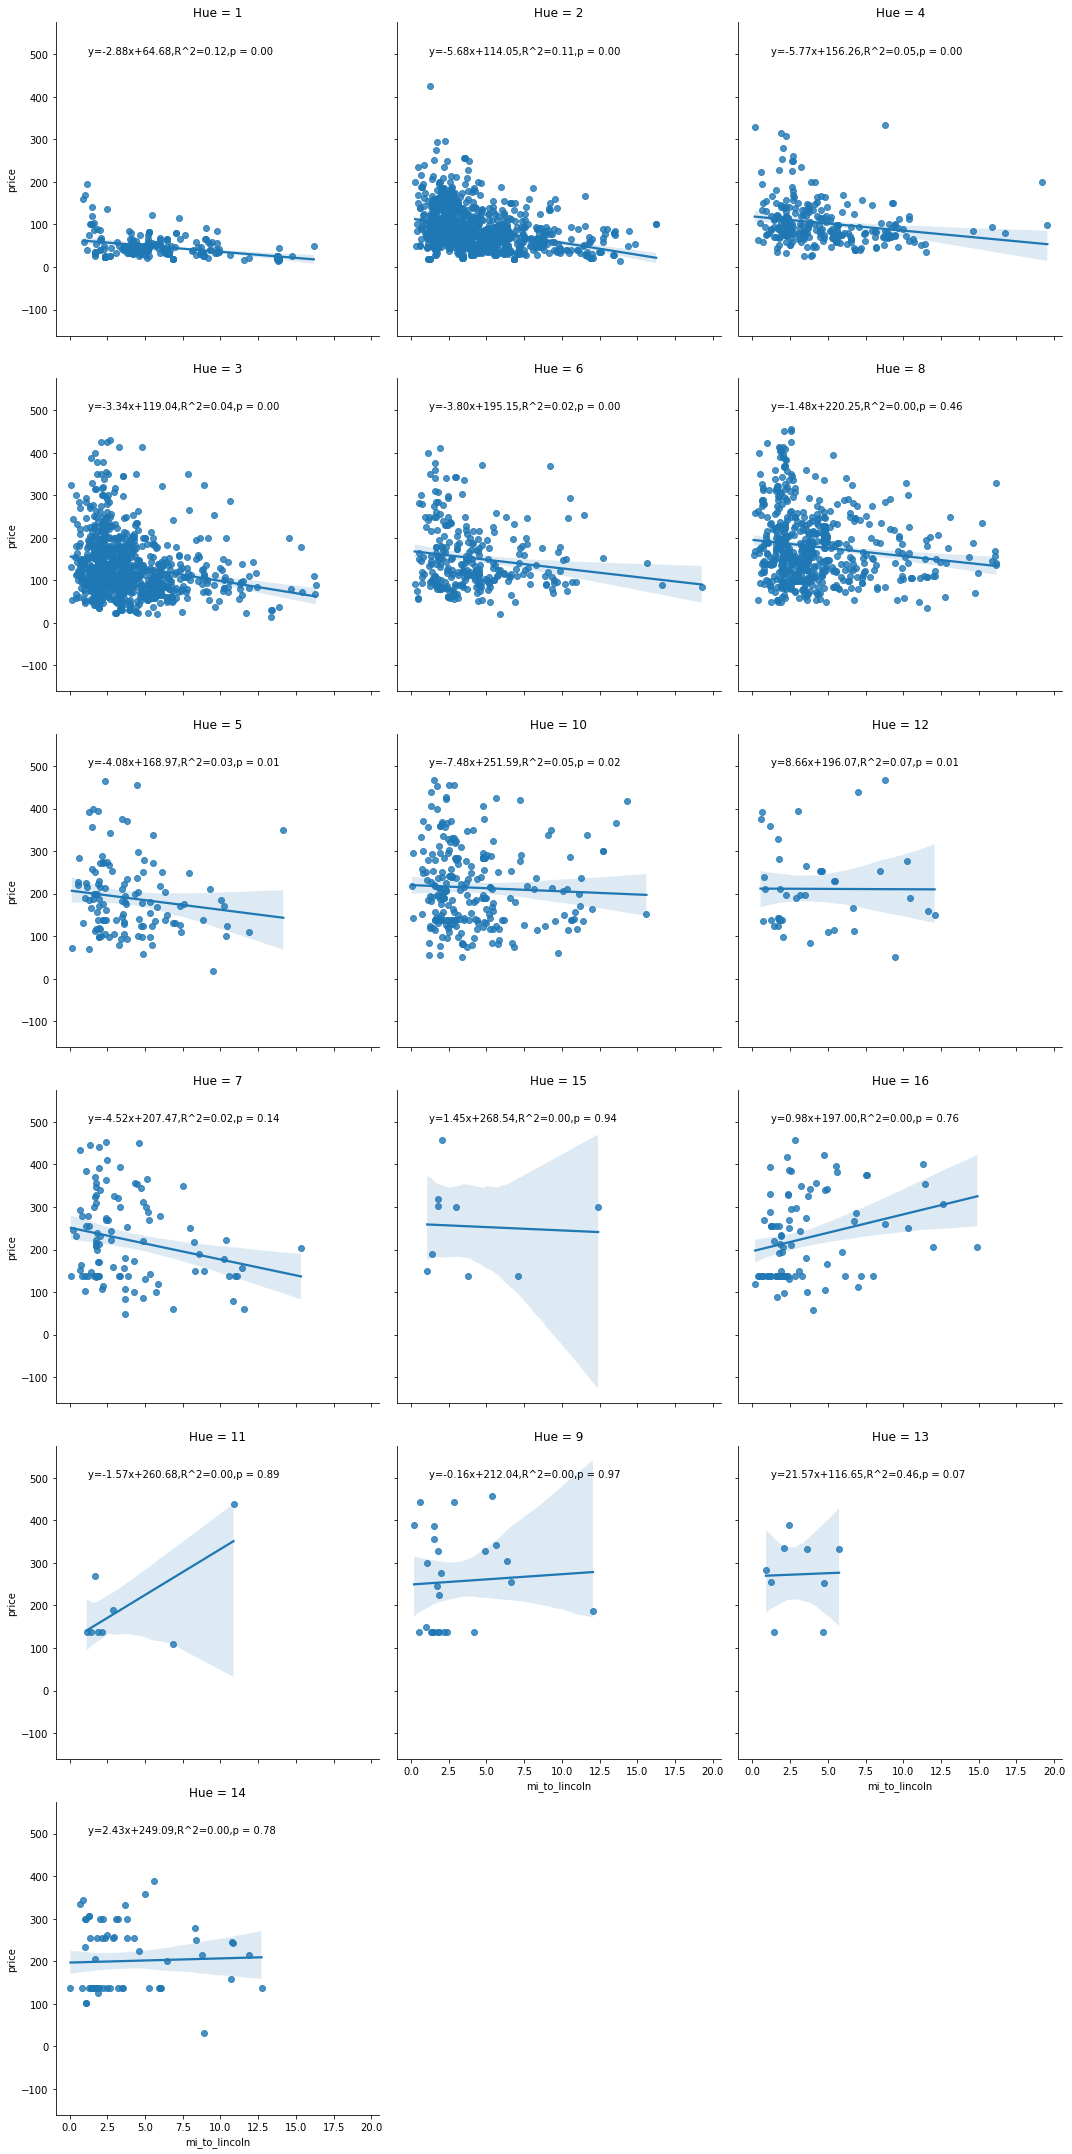

In [61]:
# Does accommodation # category have different relationship with price?
g = sns.FacetGrid(df, col = hue_var, col_wrap = 3, height = 5)
g.map(sns.regplot, location, 'price')
for i,hue in enumerate(df[hue_var].unique()):
    g.axes[i].set_title(f'Hue = {hue}')
    x = df[df[hue_var]==hue][location]
    y = df[df[hue_var]==hue]['price']
    slope, intercept, r_value, p_value, std_err = st.linregress(x,y)
    formula = f'y={slope:.2f}x+{intercept:.2f},R^2={r_value**2:.2f},p = {p_value:.2f}'
    g.axes[i].text(.1,.9,formula,transform=g.axes[i].transAxes)    

Text(0.5, 1.0, 'Miles to hot spot and Average Monthly Availability')

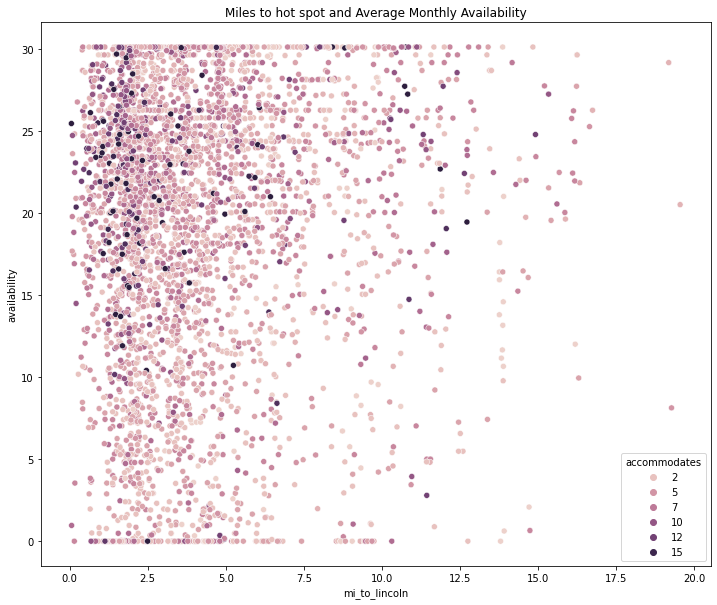

In [62]:
# distance in miles from hotspot (scatter plot) w avail
plt.figure(figsize = (12,10))
sns.scatterplot(data = df, x = location, y = 'availability', hue = hue_var)
plt.title('Miles to hot spot and Average Monthly Availability')

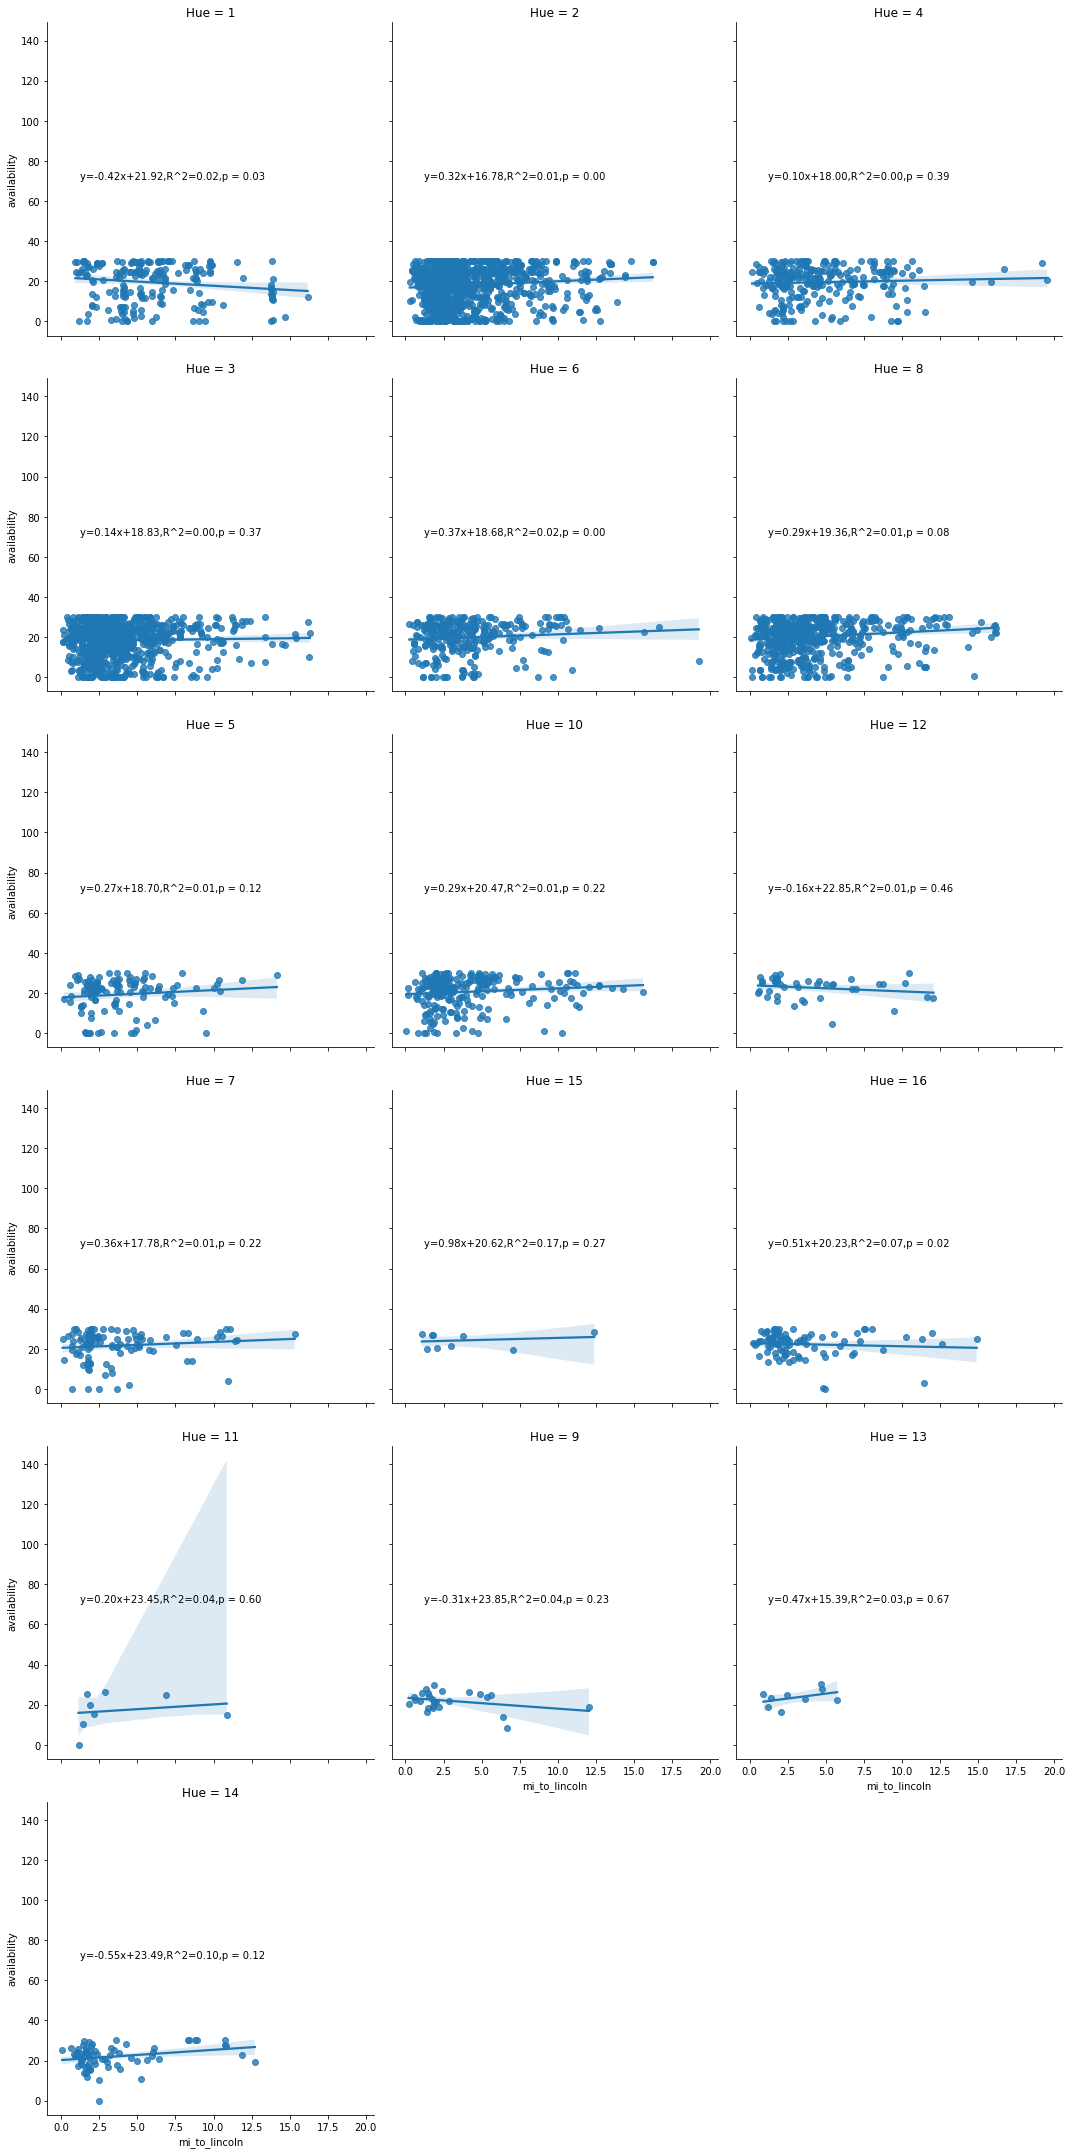

In [64]:
# Does accommodation # category have different relationship with availability?
g = sns.FacetGrid(df, col = hue_var, col_wrap = 3, height = 5)
g.map(sns.regplot, location, 'availability')
for i,hue in enumerate(df[hue_var].unique()):
    g.axes[i].set_title(f'Hue = {hue}')
    x = df[df[hue_var]==hue][location]
    y = df[df[hue_var]==hue]['availability']
    slope, intercept, r_value, p_value, std_err = st.linregress(x,y)
    formula = f'y={slope:.2f}x+{intercept:.2f},R^2={r_value**2:.2f},p = {p_value:.2f}'
    g.axes[i].text(.1,.5,formula,transform=g.axes[i].transAxes)    

# Looking into Reviews

In [ ]:
def correlation_comp(comp_col, target_col):
    results = []
    cols = df.columns
    for col in cols:
        corr, p = st.pearsonr(df[col], df[target_col])
        results.append((col, corr, p))
    corr_df = pd.DataFrame(results, columns=['Feature', 'Correlation', 'P-Value'])
    corr_df = corr_df.set_index('Feature')
    corr_df = corr_df.sort_values(by='Correlation', ascending=False)[1:]
    corr_df = corr_df.reset_index()
    # Top 10 negative and Positive Fields with price
    top_corr = pd.concat([corr_df[-10:].sort_values(by = 'Correlation').reset_index(drop = True),corr_df.head(10).reset_index(drop = True)], axis = 1)
    top_corr.columns = ['Negative Field', 'Negative Correlation','Negative P-Value','Positive Field','Positive Correlation','Positive P-Value']
    return top_corr

In [74]:
# Which review is most highly correlated with price?
cols = ['review_scores_rating','review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication','review_scores_location', 'review_scores_value']

def correlation_comp(comp_col, target_col):
    results = []
    cols = comp_col
    for col in cols:
        corr, p = st.pearsonr(df[col], df[target_col])
        results.append((col, corr, p))
    corr_df = pd.DataFrame(results, columns=['Feature', 'Correlation', 'P-Value'])
    corr_df = corr_df.set_index('Feature')
    corr_df = corr_df.sort_values(by='Correlation', ascending=False)
    corr_df = corr_df.reset_index()
    return corr_df

In [75]:
correlation_comp(cols,'price')

,Feature,Correlation,P-Value
0,review_scores_location,0.161931,5.184963e-25
1,review_scores_cleanliness,0.147097,7.097698e-21
2,review_scores_rating,0.124262,2.681426e-15
3,review_scores_accuracy,0.083347,1.218134e-07
4,review_scores_communication,0.074919,1.992764e-06
5,review_scores_checkin,0.036772,1.975475e-02
6,review_scores_value,0.032864,3.724463e-02


In [76]:
correlation_comp(cols,'availability')

,Feature,Correlation,P-Value
0,review_scores_location,-0.058297,2.179054e-04
1,review_scores_checkin,-0.062573,7.216388e-05
2,review_scores_cleanliness,-0.066227,2.654412e-05
3,review_scores_communication,-0.073645,2.967258e-06
4,review_scores_rating,-0.084560,7.961333e-08
5,review_scores_value,-0.091197,6.995170e-09
6,review_scores_accuracy,-0.091476,6.291738e-09


Text(0.5, 1.0, 'Location Score and Price')

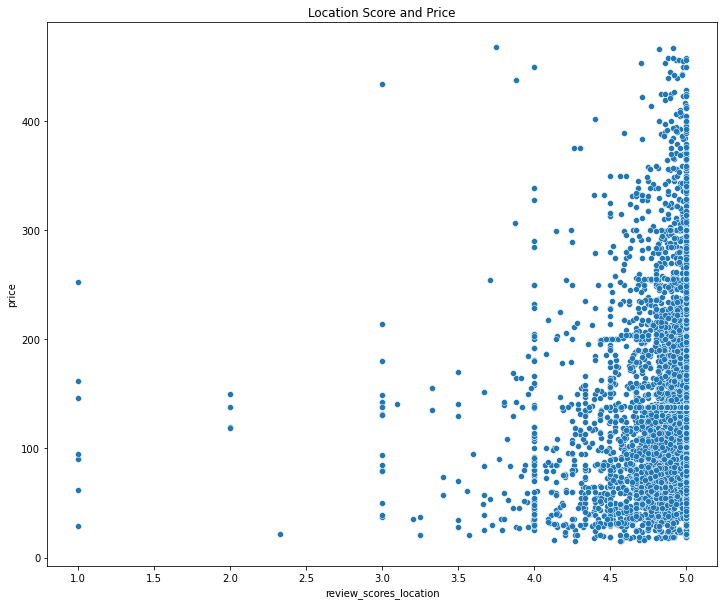

In [78]:
# Plotting location review and price
plt.figure(figsize = (12,10))
sns.scatterplot(data = df, x = 'review_scores_location', y = 'price')
plt.title('Location Score and Price')

In [82]:
# Is location score related to mi to lincoln or mi to loop?
print('Correlation of score with miles to Lincoln Park is: ' + str(st.pearsonr(df['review_scores_location'], df['mi_to_lincoln'])[0]))
print('Correlation of score with miles to Loop is: ' + str(st.pearsonr(df['review_scores_location'], df['mi_to_loop'])[0]))

Correlation of score with miles to Lincoln Park is: -0.3075433605578497
Correlation of score with miles to Loop is: -0.14363113600061092


Text(0.5, 1.0, 'Accuracy Score and Availability')

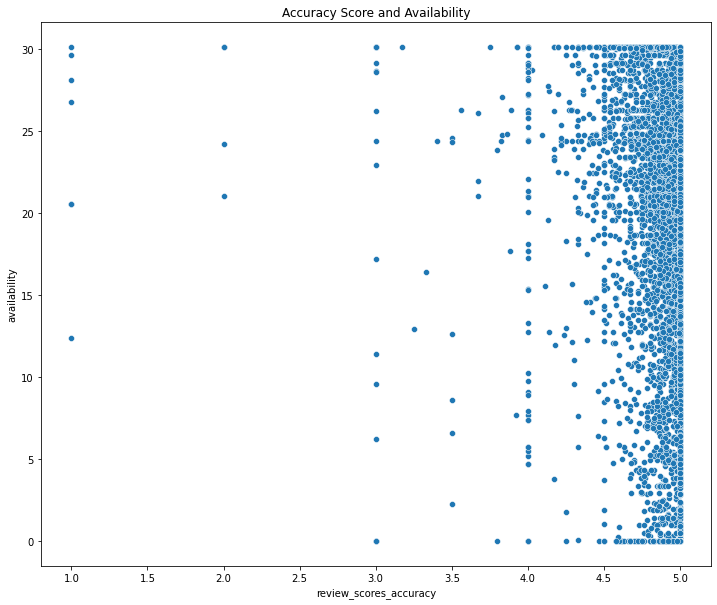

In [83]:
# plotting accuracy review and avail
plt.figure(figsize = (12,10))
sns.scatterplot(data = df, x = 'review_scores_accuracy', y = 'availability')
plt.title('Accuracy Score and Availability')

Text(0.5, 1.0, 'Number of Reviews and Price')

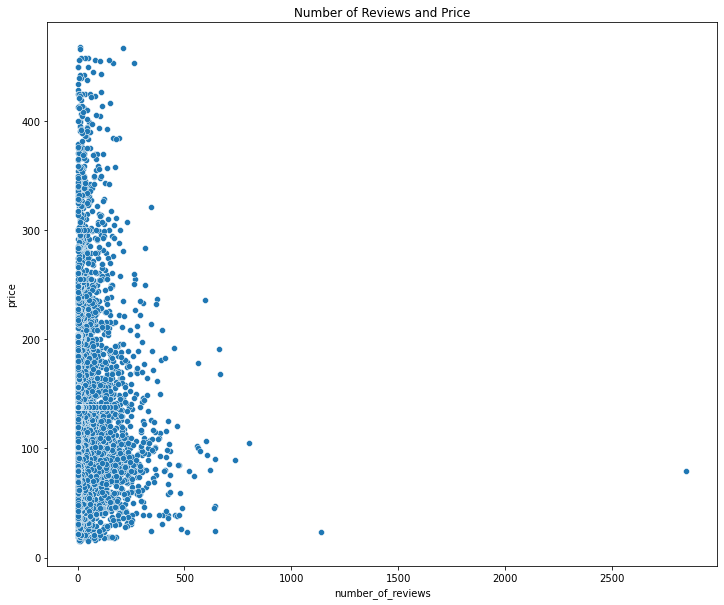

In [85]:
# DOES # OF REVIEW MATTER? V. Price
plt.figure(figsize = (12,10))
sns.scatterplot(data = df, x = 'number_of_reviews', y = 'price')
plt.title('Number of Reviews and Price')

Text(0.5, 1.0, 'Number of Reviews and Availability')

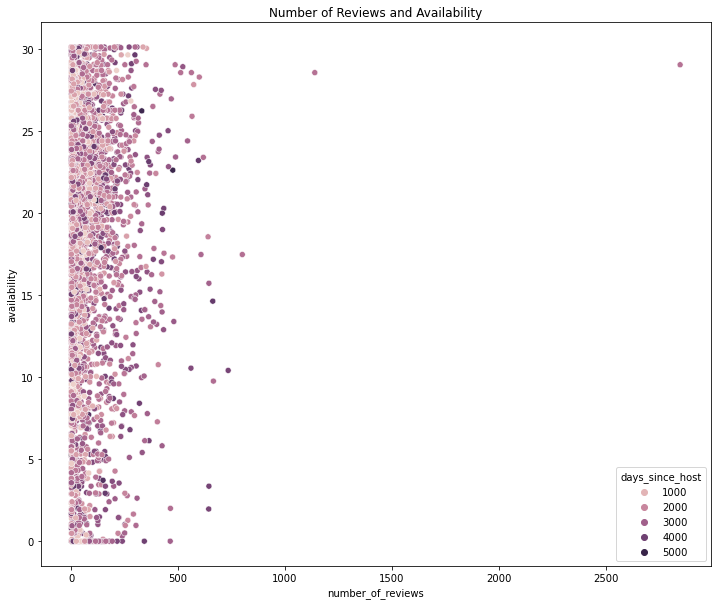

In [94]:
# DOES # OF REVIEW MATTER? V. avail
plt.figure(figsize = (12,10))
sns.scatterplot(data = df, x = 'number_of_reviews', y = 'availability', hue = 'days_since_host')
plt.title('Number of Reviews and Availability')

In [101]:
# EXPORT DF TO PICKLE
df.to_pickle("./Model_review.pkl")